In [1]:
import pandas_datareader as pdr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
import datetime
import numpy as np
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
stock = pdr.get_data_yahoo('SNE','2019-03-02','2021-03-01')
returns = stock['Adj Close']/stock['Adj Close'].shift(1)
returns = returns.dropna()
returns

Date
2019-03-05    1.000840
2019-03-06    0.997272
2019-03-07    0.976226
2019-03-08    0.990302
2019-03-11    1.003264
2019-03-12    1.004555
2019-03-13    1.007558
2019-03-14    0.988427
2019-03-15    1.002819
2019-03-18    0.996324
2019-03-19    0.988064
2019-03-20    0.950582
2019-03-21    1.016867
2019-03-22    0.955010
2019-03-25    1.002855
2019-03-26    1.013760
2019-03-27    1.001404
2019-03-28    0.990886
2019-03-29    0.996226
2019-04-01    1.017519
2019-04-02    0.981154
2019-04-03    1.005217
2019-04-04    1.003067
2019-04-05    1.012935
2019-04-08    1.081960
2019-04-09    0.991202
2019-04-10    0.997619
2019-04-11    1.003689
2019-04-12    1.016000
2019-04-15    1.006810
                ...   
2021-01-15    0.986753
2021-01-19    1.001764
2021-01-20    1.006456
2021-01-21    0.996696
2021-01-22    0.985958
2021-01-25    0.981901
2021-01-26    1.004331
2021-01-27    0.972821
2021-01-28    1.006701
2021-01-29    0.980133
2021-02-01    1.029464
2021-02-02    1.007206
2021-0

In [3]:
test = returns[450:]
returns = returns[:450]
sd = seasonal_decompose(returns,period=5) # tried period = 5 and 20 (one week vs. one month), 5 has better residuals

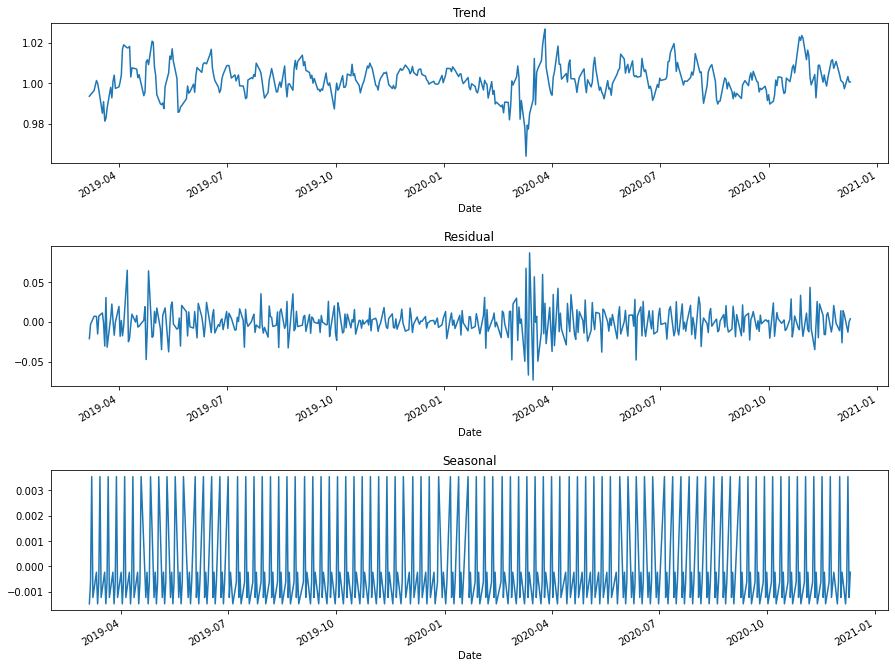

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,12))
plt.subplots_adjust(hspace=0.6)
sd.trend.plot(ax=ax1)
ax1.set_title('Trend')
sd.resid.plot(ax=ax2)
ax2.set_title('Residual')
sd.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
plt.show()

In [5]:
aa = auto_arima(returns)
aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  450
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1142.634
Date:                Sun, 07 Mar 2021   AIC                          -2279.267
Time:                        21:04:01   BIC                          -2266.939
Sample:                             0   HQIC                         -2274.408
                                - 450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1657      0.032     36.187      0.000       1.103       1.229
ar.L1         -0.1637      0.032     -5.079      0.000      -0.227      -0.101
sigma2         0.0004   1.42e-05     25.738      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       62.38   Jarque-Bera (JB):               285.91
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.10
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
model = ARIMA(returns,order=(1,0,0))
result=model.fit()

In [7]:
forecast = result.predict(start=450,end=502)
forecast = forecast[1:]
forecast.index = test.index

In [8]:
df = pd.DataFrame({'Forecast':forecast,'Actual':test},index = test.index)

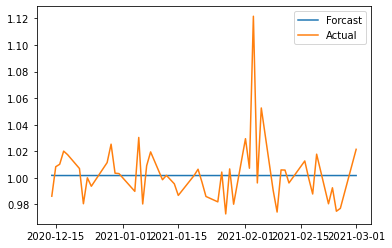

In [9]:
plt.plot(df.Forecast,label='Forcast')
plt.plot(df.Actual,label='Actual')
plt.legend()
plt.show()

In [10]:
print('RMSE:',np.sqrt(((df.Forecast - df.Actual) ** 2).mean()))
print('MAE:',abs(df.Forecast - df.Actual).mean())

RMSE: 0.0232079460279155
MAE: 0.014931838042076533
